# Task 1 - Exploratory Data Analysis

---

## Section 1 - Setup

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set working directory
import os
os.getcwd()
os.chdir('C:\\Users\\Dubey\\Downloads')

---

## Section 2 - Data loading



In [4]:
df = pd.read_csv('sample_sales_data.csv')
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [7]:
df.shape

(7829, 9)

In [8]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [9]:
df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [11]:
df.duplicated().sum()

0

---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

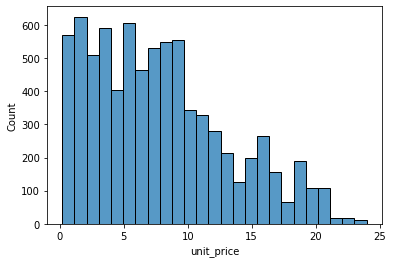

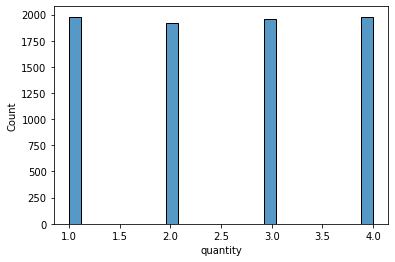

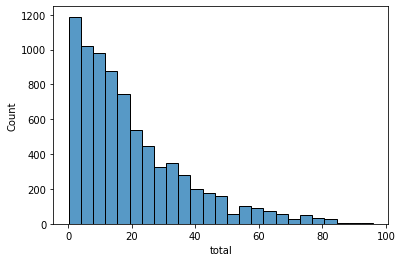

In [13]:
for col in [col for col in df.columns if df[col].dtype != 'object']:
    sns.histplot(x=col, data=df, bins=25)
    plt.show()

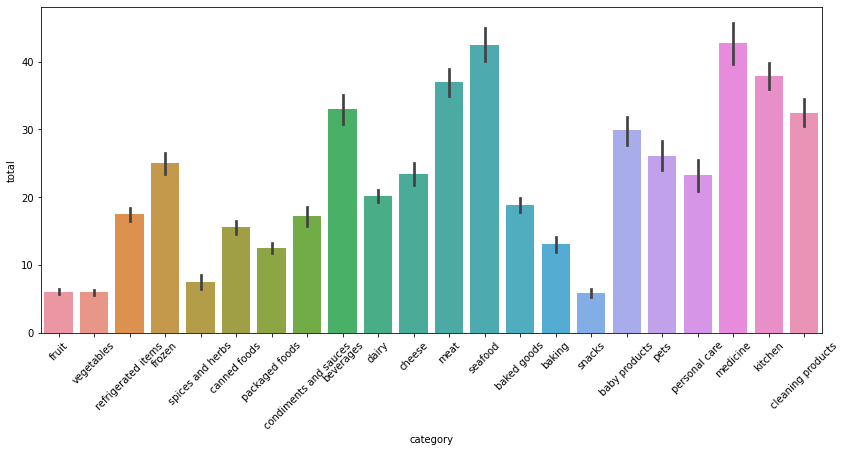

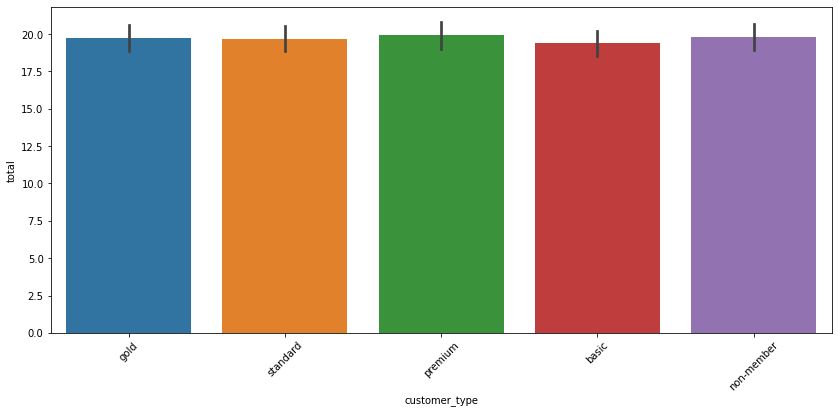

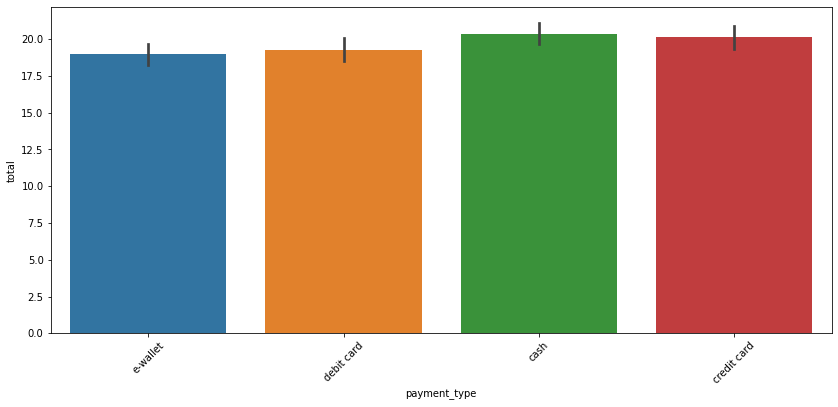

In [15]:
for col in [col for col in df.columns[3:] if df[col].dtype == 'object']:
    plt.figure(figsize=(14,6))
    plt.xticks(rotation=45)
    sns.barplot(x=col, y='total', data=df)
    plt.show()

In [19]:
# value counts in the object type data
def print_value_counts(df):
  for col in df:
    if df[col].dtype == 'object':
      print(f'Column {col}:')
      print(df[col].value_counts(), end='\n\n')
print_value_counts(df)

Column transaction_id:
a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
                                       ..
a9abe5ac-99d5-4d8b-bbbd-c2a207642849    1
6b0b23e8-412b-4665-8cc4-3e37f0d9e195    1
711a4162-1985-4f5a-94ca-137cfacaeadf    1
7d1e9010-dbaf-4770-a467-f31477910f7a    1
afd70b4f-ee21-402d-8d8f-0d9e13c2bea6    1
Name: transaction_id, Length: 7829, dtype: int64

Column timestamp:
2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: timestamp, Length: 7738, dtype: int64

Column product_id:
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-a

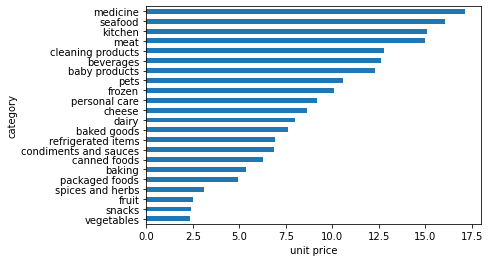

In [20]:
df.groupby('category')['unit_price'].mean().sort_values().plot(kind='barh')
plt.xlabel('unit price')
plt.show()

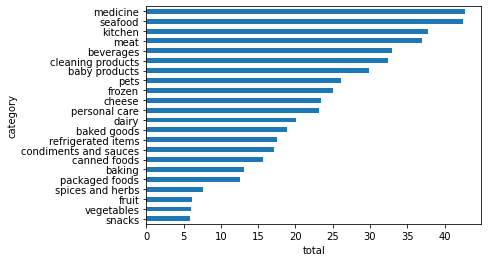

In [26]:
df.groupby('category')['total'].mean().sort_values().plot(kind='barh')
plt.xlabel('total')
plt.show()


In [28]:
df.nunique()

transaction_id    7829
timestamp         7738
product_id         300
category            22
customer_type        5
unit_price          64
quantity             4
total              256
payment_type         4
dtype: int64

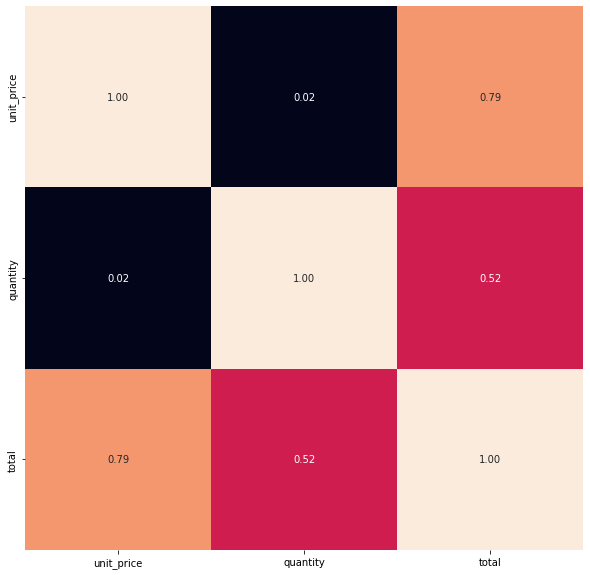

In [30]:
fig=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cbar=False)
plt.show()

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data. 

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

Insights:

* Medicine and seafood are top in sales
* Fruits and vegetables are the most frequently bought categories
* Category column contains variety which makes it a good candidate for modelling